In [46]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [47]:
df = pd.read_csv('elapsed-time-experimental-group.csv')
df

,vms,elapsed
0,10,19.7
1,20,28.7
2,30,44.3
3,40,69.2
4,50,129.7


In [48]:
df = df.dropna() # drop all rows that have NAN/none

In [49]:
df.corr()

,vms,elapsed
vms,1.000000,0.934004
elapsed,0.934004,1.000000


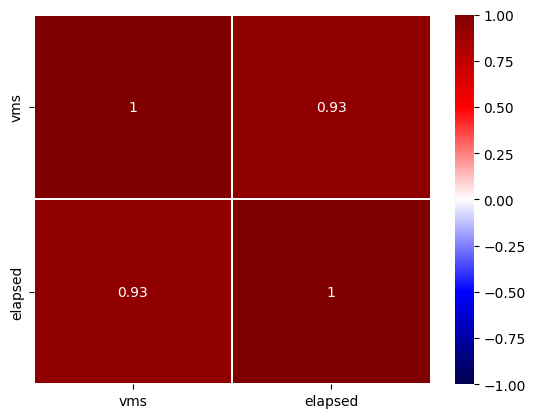

In [50]:
# plt.figure(figsize=(10,10))
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='seismic' )
plt.show()

In [51]:
x = torch.FloatTensor(df[['vms']].values) # 특성 데이터
y = torch.FloatTensor(df[['elapsed']].values) # 라벨

In [52]:
model = Sequential()
model.add_module('nn1', Linear(1,1))
list(model.parameters())

[Parameter containing:
 tensor([[-0.9294]], requires_grad=True),
 Parameter containing:
 tensor([-0.8524], requires_grad=True)]

In [53]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [54]:
hist = []
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())
    hist.append(cost.item())

0 10275.60546875
1 9606.0966796875
2 8960.4765625
3 8339.1337890625
4 7742.4091796875
5 7170.59521484375
6 6623.92431640625
7 6102.5732421875
8 5606.6552734375
9 5136.21533203125
10 4691.22900390625
11 4271.6015625
12 3877.15966796875
13 3507.655029296875
14 3162.760986328125
15 2842.070068359375
16 2545.09912109375
17 2271.284423828125
18 2019.987060546875
19 1790.494384765625
20 1582.0238037109375
21 1393.726318359375
22 1224.6942138671875
23 1073.963623046875
24 940.5250244140625
25 823.3292846679688
26 721.2960815429688
27 633.3246459960938
28 558.30126953125
29 495.1099548339844
30 442.64263916015625
31 399.8074645996094
32 365.54022216796875
33 338.81121826171875
34 318.6346435546875
35 304.07537841796875
36 294.255859375
37 288.36053466796875
38 285.64093017578125
39 285.417236328125
40 287.08135986328125
41 290.0960998535156
42 293.99468994140625
43 298.37969970703125
44 302.91900634765625
45 307.3429260253906
46 311.4399719238281
47 315.0513000488281
48 318.0660095214844
49 32

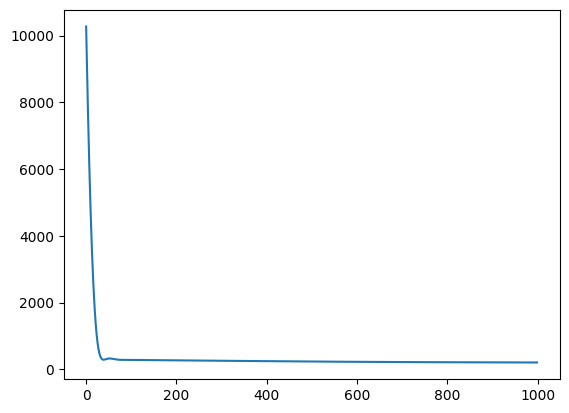

In [55]:
plt.plot(hist)
plt.show()

In [56]:
model[0].weight

Parameter containing:
tensor([[2.4719]], requires_grad=True)

In [57]:
model[0].bias

Parameter containing:
tensor([-14.9789], requires_grad=True)

In [58]:
# model( torch.FloatTensor([[15]]))
pred = model(x).detach().numpy()

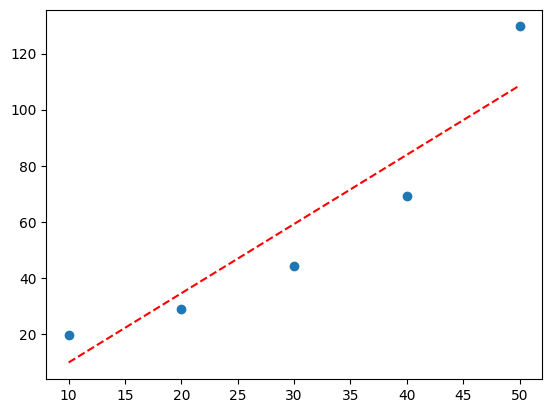

In [59]:
plt.scatter(x, y)
plt.plot(x, pred, 'r--') # r-- : Red, dashed line
plt.show()